In [31]:
%matplotlib inline
import matplotlib
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [32]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [33]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
from sqlalchemy import Column, Integer, String, Float

In [34]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

In [35]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
session = Session(bind=engine)
# reflect the tables

In [36]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [37]:
# Save references to each table (1 of 2)
columns1 = inspector.get_columns('measurement')
for c1 in columns1:
    print(c1['name'], c1["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [38]:
# save references to each table (2 of 2)
columns2 = inspector.get_columns('station')
for c2 in columns2:
    print(c2['name'], c2["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [39]:
# View all of the classes that automap found
Measurement = Base.classes.measurement
Station = Base.classes.station
Base.classes.keys()

['measurement', 'station']

In [40]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [41]:
import datetime as dt
from datetime import date, timedelta

In [42]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23')

In [43]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database. 

In [44]:
# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8 ,23) - dt.timedelta(days=365)
year_ago = year_ago.strftime('%Y-%m-%d')
year_ago

'2016-08-23'

In [45]:
# Perform a query to retrieve the data and precipitation scores.
dates = session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.desc()).all()
df = pd.DataFrame(dates, columns =['Date', 'Prcp'])
df.head(10)

,Date,Prcp
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00
5,2017-08-22,0.00
6,2017-08-22,0.50
7,2017-08-21,0.00
8,2017-08-21,0.02
9,2017-08-21,NaN


In [46]:
# Remove rows with no incidence recorded (no 'prcp' values).
df = df.dropna()
df.head(10)

,Date,Prcp
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00
5,2017-08-22,0.00
6,2017-08-22,0.50
7,2017-08-21,0.00
8,2017-08-21,0.02
10,2017-08-21,0.56


In [47]:
# Retrieve the last 12 months of precipitation data.
# Save the query results as a Pandas DataFrame.
df = df[df.Date > year_ago]
df

,Date,Prcp
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00
...,...,...
2217,2016-08-24,2.15
2218,2016-08-24,2.28
2220,2016-08-24,1.22
2221,2016-08-24,2.15


In [48]:
# Set the index to the date column.
df.columns = [col.strip() for col in df.columns.tolist()]
# df.set_index('Date', inplace=True)
df

,Date,Prcp
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00
...,...,...
2217,2016-08-24,2.15
2218,2016-08-24,2.28
2220,2016-08-24,1.22
2221,2016-08-24,2.15


In [49]:
# Save the query results as a Pandas DataFrame. DONE!
# Sort the dataframe by date. DONE!



In [50]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


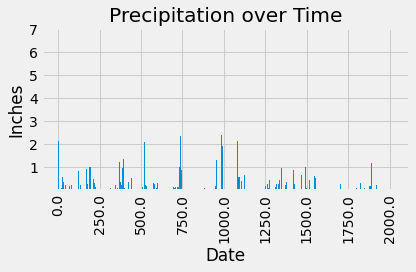

In [51]:
# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots()
ypos = range(1, len(df.Prcp)+1)
ax.bar(ypos, df.Prcp[::-1])
ax.set_xlabel("Date")
ax.set_ylabel("Inches")
ax.xaxis.set_major_locator(plt.MaxNLocator(9))
ax.set_xticklabels(ax.get_xticks(), rotation = 90)
ax.set_yticks((1,2,3,4,5,6,7))
ax.set_yticklabels(("1","2","3","4","5","6","7"))
ax.set_title("Precipitation over Time")
fig.tight_layout()
plt.show()

# Exploratory Station Analysis

In [52]:
# Design a query to calculate the total number stations in the data.
temps = session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.tobs).order_by(Measurement.date.desc()).all()
df1 = pd.DataFrame(temps, columns =['Id', 'Station', 'Date', 'Tobs'])
# Only extract observations over the past 12 months.
df1 = df1[df1.Date > year_ago]
df1.head(10)

,Id,Station,Date,Tobs
0,2724,USC00519397,2017-08-23,81.0
1,7635,USC00514830,2017-08-23,82.0
2,12187,USC00519523,2017-08-23,82.0
3,19550,USC00516128,2017-08-23,76.0
4,2723,USC00519397,2017-08-22,82.0
5,12186,USC00519523,2017-08-22,82.0
6,19549,USC00516128,2017-08-22,76.0
7,2722,USC00519397,2017-08-21,81.0
8,7634,USC00514830,2017-08-21,79.0
9,12185,USC00519523,2017-08-21,82.0


In [53]:
# Total number stations in the data = 7 over the last 12 months
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
df1.groupby('Station')['Id'].count().sort_values(ascending=False)

Station
USC00519397    360
USC00519281    351
USC00516128    348
USC00513117    342
USC00519523    336
USC00514830    304
USC00517948    182
Name: Id, dtype: int64

In [54]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
df2 = df1[df1.Station == 'USC00519397']
df2.describe()

,Id,Tobs
count,360.000000,360.000000
mean,2544.500000,75.194444
std,104.067286,4.961239
min,2365.000000,60.000000
25%,2454.750000,72.000000
50%,2544.500000,77.000000
75%,2634.250000,79.000000
max,2724.000000,87.000000


In [55]:
df2.head()

,Id,Station,Date,Tobs
0,2724,USC00519397,2017-08-23,81.0
4,2723,USC00519397,2017-08-22,82.0
7,2722,USC00519397,2017-08-21,81.0
11,2721,USC00519397,2017-08-20,81.0
14,2720,USC00519397,2017-08-19,79.0


In [56]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
df3 = df2.groupby(['Tobs']).count()['Id'].sort_values(ascending=False)
df3.head()

Tobs
80.0    48
79.0    41
77.0    38
78.0    36
76.0    24
Name: Id, dtype: int64

In [57]:
df4 = pd.DataFrame({'Frequency':df3})
df4.reset_index(inplace=True)
df4

,Tobs,Frequency
0,80.0,48
1,79.0,41
2,77.0,38
3,78.0,36
4,76.0,24
5,71.0,21
6,75.0,21
7,81.0,19
8,72.0,17
9,74.0,16


In [58]:
df3.columns=['Tobs', 'Frequency']
df3

Tobs
80.0    48
79.0    41
77.0    38
78.0    36
76.0    24
71.0    21
75.0    21
81.0    19
72.0    17
74.0    16
73.0    13
69.0    10
70.0     9
66.0     8
68.0     7
67.0     7
64.0     5
62.0     4
65.0     4
63.0     4
82.0     3
61.0     2
87.0     1
83.0     1
60.0     1
Name: Id, dtype: int64

([<matplotlib.axis.XTick at 0x1ae64813cc0>,
 [Text(0, 0, '80.0'),
  Text(0, 0, '79.0'),
  Text(0, 0, '77.0'),
  Text(0, 0, '78.0'),
  Text(0, 0, '76.0'),
  Text(0, 0, '71.0'),
  Text(0, 0, '75.0'),
  Text(0, 0, '81.0'),
  Text(0, 0, '72.0'),
  Text(0, 0, '74.0'),
  Text(0, 0, '73.0'),
  Text(0, 0, '69.0'),
  Text(0, 0, '70.0'),
  Text(0, 0, '66.0'),
  Text(0, 0, '68.0'),
  Text(0, 0, '67.0'),
  Text(0, 0, '64.0'),
  Text(0, 0, '62.0'),
  Text(0, 0, '65.0'),
  Text(0, 0, '63.0'),
  Text(0, 0, '82.0'),
  Text(0, 0, '61.0'),
  Text(0, 0, '87.0'),
  Text(0, 0, '83.0'),
  Text(0, 0, '60.0')])

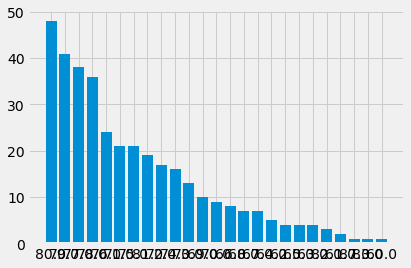

In [59]:
x = np.arange(25)
plt.bar(x, height = df4.Frequency)
plt.xticks(x, df4.Tobs)

# Close session

In [60]:
# Close Session
session.close()